Лабораторная No 5. Обработка текстовых данных из открытых источников




Новости и отзывы на интернет-ресурсах, посты в социальных сетях... Текстовые данные встречаются повсеместно. Ваша задача - использовать эти данные для решения задачи, связанной с обработкой текстовых данных.
**Данные должны быть связаны с финансами и экономикой!**

Этапы:



In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/NLP/data.csv')
data.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

1. Сформулируйте одну задачу, связанную с обработкой текстовых данных.

*   оценка тональности (в качестве разметки можно брать оценку в отзыве);
*   Соберите/скачайте данные открытых источников для решения поставленной
задачи. Если необходимо, предобработайте текстовые данные с использованием
нестандартных методов (например, обработка хештегов, удаление стоп-слов,
специфичных для предметной области и др.).


In [ ]:
data.isna().sum()

Sentence     0
Sentiment    0
dtype: int64

In [ ]:
data['Sentiment'].value_counts()

neutral     3130
positive    1852
negative     860
Name: Sentiment, dtype: int64

2. Обучите несколько моделей для решения вашей задачи, изменяя гиперпараметры
модели.

BOW

Обработка текстовых данных

In [ ]:
data['Sentence'] = data['Sentence'].apply(lambda x: x.lower())
data.head()

,Sentence,Sentiment
0,the geosolutions technology will leverage bene...,positive
1,"$esi on lows, down $1.50 to $2.50 bk a real po...",negative
2,"for the last quarter of 2010 , componenta 's n...",positive
3,according to the finnish-russian chamber of co...,neutral
4,the swedish buyout firm has sold its remaining...,neutral


In [ ]:
data['Sentence'] = data['Sentence'].apply(lambda x: re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+\b)', '', x))
data.head()

,Sentence,Sentiment
0,the geosolutions technology will leverage bene...,positive
1,"$esi on lows, down $1.50 to $2.50 bk a real po...",negative
2,"for the last quarter of 2010 , componenta 's n...",positive
3,according to the finnish-russian chamber of co...,neutral
4,the swedish buyout firm has sold its remaining...,neutral


In [ ]:
data['Sentence'] = data['Sentence'].apply(lambda x: re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '' , str(x)))
data.head()

,Sentence,Sentiment
0,the geosolutions technology will leverage bene...,positive
1,"$esi on lows, down $1.50 to $2.50 bk a real po...",negative
2,"for the last quarter of 2010 , componenta 's n...",positive
3,according to the finnish-russian chamber of co...,neutral
4,the swedish buyout firm has sold its remaining...,neutral


In [ ]:
data['Sentence'] = data['Sentence'].apply(lambda x: re.sub('RT', '', x))
data.head()

,Sentence,Sentiment
0,the geosolutions technology will leverage bene...,positive
1,"$esi on lows, down $1.50 to $2.50 bk a real po...",negative
2,"for the last quarter of 2010 , componenta 's n...",positive
3,according to the finnish-russian chamber of co...,neutral
4,the swedish buyout firm has sold its remaining...,neutral


In [ ]:
data['Sentence'] = data['Sentence'].apply(lambda x: re.sub('[^a-z A-Z 0-9-]+', '', x))
data.head()

,Sentence,Sentiment
0,the geosolutions technology will leverage bene...,positive
1,esi on lows down 150 to 250 bk a real possibility,negative
2,for the last quarter of 2010 componenta s net...,positive
3,according to the finnish-russian chamber of co...,neutral
4,the swedish buyout firm has sold its remaining...,neutral


In [ ]:
data['Sentence'] = data['Sentence'].apply(lambda x: " ".join(x.split()))
data.head()

,Sentence,Sentiment
0,the geosolutions technology will leverage bene...,positive
1,esi on lows down 150 to 250 bk a real possibility,negative
2,for the last quarter of 2010 componenta s net ...,positive
3,according to the finnish-russian chamber of co...,neutral
4,the swedish buyout firm has sold its remaining...,neutral


In [ ]:
from bs4 import BeautifulSoup
data['Sentence'] = data['Sentence'].apply(lambda x: BeautifulSoup(x, 'lxml').get_text())
data.head()

,Sentence,Sentiment
0,the geosolutions technology will leverage bene...,positive
1,esi on lows down 150 to 250 bk a real possibility,negative
2,for the last quarter of 2010 componenta s net ...,positive
3,according to the finnish-russian chamber of co...,neutral
4,the swedish buyout firm has sold its remaining...,neutral


In [ ]:
import unicodedata

def remove_accented_chars(x):
    x =  unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return x

data['Sentence'] = data['Sentence'].apply(remove_accented_chars)
data.head()

,Sentence,Sentiment
0,the geosolutions technology will leverage bene...,positive
1,esi on lows down 150 to 250 bk a real possibility,negative
2,for the last quarter of 2010 componenta s net ...,positive
3,according to the finnish-russian chamber of co...,neutral
4,the swedish buyout firm has sold its remaining...,neutral


In [ ]:
from spacy.lang.en.stop_words import STOP_WORDS
data['Sentence'] = data['Sentence'].apply(lambda x: " ".join([i for i in x.split() if i not in STOP_WORDS]) )

data.head()

,Sentence,Sentiment
0,geosolutions technology leverage benefon s gps...,positive
1,esi lows 150 250 bk real possibility,negative
2,quarter 2010 componenta s net sales doubled eu...,positive
3,according finnish-russian chamber commerce maj...,neutral
4,swedish buyout firm sold remaining 224 percent...,neutral


In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')
def make_to_base(x):
    x = str(x)
    x_list = []
    doc = nlp(x)

    for token in doc:
        lemma = token.lemma_
        if lemma == '-PRON-' or lemma == 'be':
            lemma = token.text

        x_list.append(lemma)
    return ' '.join(x_list)

data['Sentiment'] = data['Sentiment'].apply(lambda x: make_to_base(x))
data.head()

,Sentence,Sentiment
0,geosolutions technology leverage benefon s gps...,positive
1,esi lows 150 250 bk real possibility,negative
2,quarter 2010 componenta s net sales doubled eu...,positive
3,according finnish-russian chamber commerce maj...,neutral
4,swedish buyout firm sold remaining 224 percent...,neutral


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
trf  = le.fit_transform(data[['Sentiment']])
trf = pd.DataFrame(trf)
data['Sentiment'] = trf
data.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Sentence,Sentiment
0,geosolutions technology leverage benefon s gps...,2
1,esi lows 150 250 bk real possibility,0
2,quarter 2010 componenta s net sales doubled eu...,2
3,according finnish-russian chamber commerce maj...,1
4,swedish buyout firm sold remaining 224 percent...,1


Разделяем на обучающие и тестовые выборки

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(data['Sentence'], data['Sentiment'], test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

xtrain_bow = vectorizer.fit_transform(xtrain).toarray()
xtest_bow = vectorizer.transform(xtest).toarray()

Обучение

GaussianNB,
MultinomialNB,
BernoulliNB

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(xtrain_bow, ytrain)
y_preds_gnb = gnb.predict(xtest_bow)

mnb.fit(xtrain_bow, ytrain)
y_preds_mnb = mnb.predict(xtest_bow)

bnb.fit(xtrain_bow, ytrain)
y_preds_bnb = bnb.predict(xtest_bow)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def metrics(prediction, actual):
    print('Confusion_matrix \n', confusion_matrix(actual, prediction))
    print('\nAccuracy:', accuracy_score(actual, prediction))
    print('\nclassification_report\n')
    print(classification_report(actual, prediction))

3. Оцените полученные результаты с использованием известных вам метрик.

In [ ]:
print(gnb)
metrics(y_preds_gnb, ytest)
print(mnb)
metrics(y_preds_mnb, ytest)
print(bnb)
metrics(y_preds_bnb, ytest)

GaussianNB()
Confusion_matrix 
 [[ 64  76  35]
 [128 360 134]
 [ 76  98 198]]

Accuracy: 0.5320786997433704

classification_report

              precision    recall  f1-score   support

           0       0.24      0.37      0.29       175
           1       0.67      0.58      0.62       622
           2       0.54      0.53      0.54       372

    accuracy                           0.53      1169
   macro avg       0.48      0.49      0.48      1169
weighted avg       0.57      0.53      0.55      1169

MultinomialNB()
Confusion_matrix 
 [[ 55  79  41]
 [ 59 506  57]
 [ 28  99 245]]

Accuracy: 0.6894781864841745

classification_report

              precision    recall  f1-score   support

           0       0.39      0.31      0.35       175
           1       0.74      0.81      0.77       622
           2       0.71      0.66      0.69       372

    accuracy                           0.69      1169
   macro avg       0.61      0.60      0.60      1169
weighted avg       0.68   

4. Сделайте выводы.

1. Модель GaussianNB:

Accuracy: 0.532,
Precision: 0.24-0.67,
Recall: 0.37-0.58,
F1-score: 0.29-0.62
2. Модель MultinomialNB:

Accuracy: 0.689,
Precision: 0.39-0.74,
Recall: 0.31-0.81,
F1-score: 0.35-0.77,
3. Модель BernoulliNB:

Accuracy: 0.673,
Precision: 0.30-0.73,
Recall: 0.06-0.92,
F1-score: 0.10-0.63

Сложно рекомендовать какую-либо из представленных моделей.

MultinomialNB может быть предпочтительнее, если важна максимальная точность, но с риском нестабильности.

BernoulliNB может быть более надежным выбором, если важна F1-мера, но с низкими значениями по другим метрикам.

GaussianNB может быть более предсказуемой, но менее эффективной.

Для достижения более высоких показателей точности можно:

Использовать более сложные модели.

Увеличить размер обучающей выборки.

Применить методы предобработки текста, которые лучше подходят для этого датасета.

5. Напишите небольшой отчет с результатами. Отчет должен содержать ~5
содержательных страниц с описанием шагов и иллюстрациями:
*   постановка задачи;
*   описание данных, сбор данных (если применимо
*   схема решения;
*   результаты экспериментов (графики/таблицы);
*   что можно сделать для улучшения качества решения вашей задачи?
*   выводы.

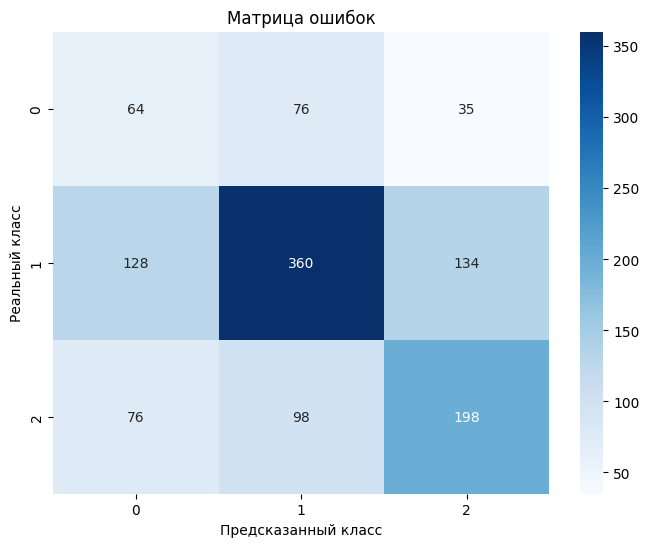

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(ytest, y_preds_gnb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.title('Матрица ошибок')
plt.xlabel('Предсказанный класс')
plt.ylabel('Реальный класс')
plt.show()

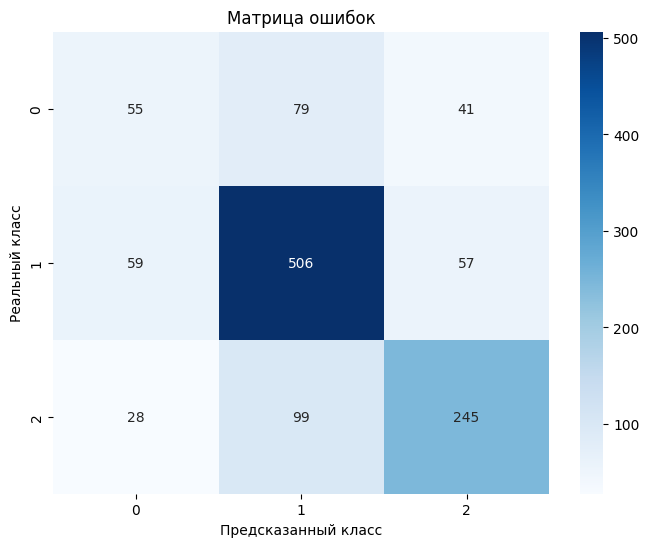

In [ ]:
conf_matrix = confusion_matrix(ytest, y_preds_mnb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.title('Матрица ошибок')
plt.xlabel('Предсказанный класс')
plt.ylabel('Реальный класс')
plt.show()

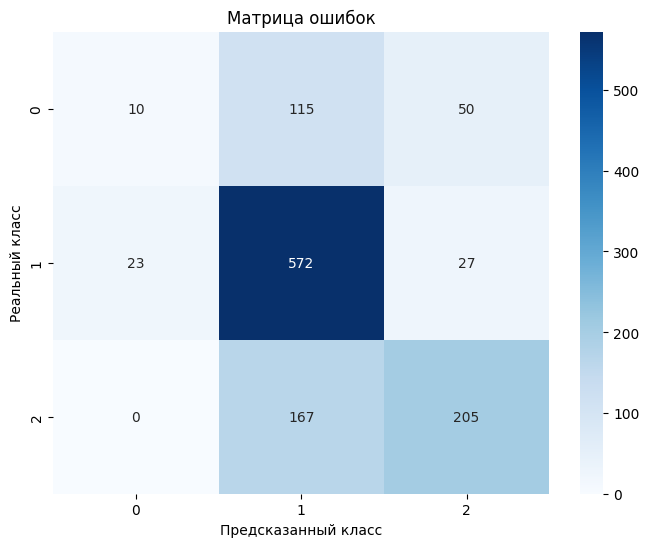

In [ ]:
conf_matrix = confusion_matrix(ytest, y_preds_bnb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.title('Матрица ошибок')
plt.xlabel('Предсказанный класс')
plt.ylabel('Реальный класс')
plt.show()

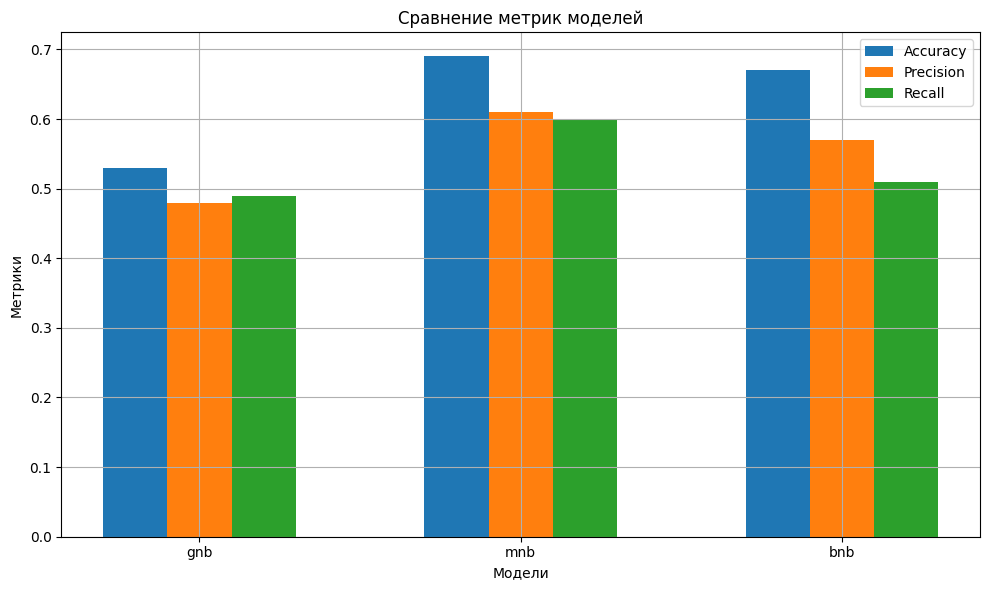

In [ ]:
import matplotlib.pyplot as plt

models = ['gnb', 'mnb', 'bnb']
accuracy = [0.53, 0.69, 0.67]
precision = [0.48, 0.61, 0.57]
recall = [0.49, 0.60, 0.51]

plt.figure(figsize=(10, 6))
bar_width = 0.2
index = range(len(models))

plt.bar(index, accuracy, bar_width, label='Accuracy')
plt.bar([i + bar_width for i in index], precision, bar_width, label='Precision')
plt.bar([i + 2 * bar_width for i in index], recall, bar_width, label='Recall')

plt.xlabel('Модели')
plt.ylabel('Метрики')
plt.title('Сравнение метрик моделей')
plt.xticks([i + bar_width for i in index], models)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


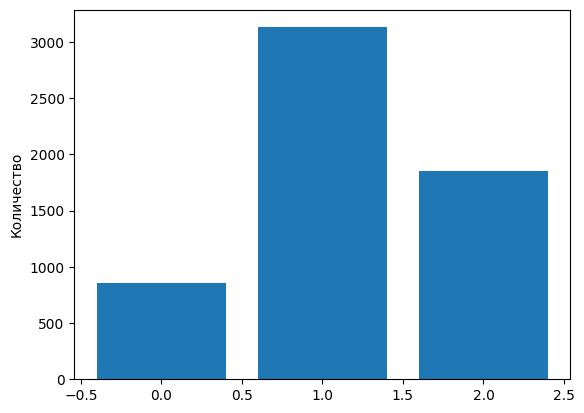

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

target_values = data['Sentiment']
value_counts = target_values.value_counts()
plt.bar(value_counts.index, value_counts.values)
plt.ylabel('Количество')
plt.show()